#Relax Challenge

In [1]:
#import library

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#load data
train = pd.read_csv('takehome_users.csv', encoding='latin-1')
engagement = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')

In [3]:
#exam data
train.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
#check the data type of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
# opted_in_to_mailing_list and enabled_for_marketing_drip are categorical data, have to change them to categorical type later. 
#creation_time has to be change to datetime data type later.

In [7]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
#has to change time_stamp data type to datetime. 

In [9]:
#describe data
train.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [10]:
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


#"adopted user" as a user who has logged into the product on three separatedays in at least one sevenday period
#we can work on engagement dataset first to figure out 'adopted user'

In [11]:
#change time_stamp column object type to datetime type
engagement['time_stamp']= pd.to_datetime(engagement['time_stamp'], format = '%Y-%m-%d %H:%M:%S')

In [12]:
# define a function to see if a user logged in on 3 seperate days in a 7-day period.
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))

In [13]:
# run the function on all users
adopted = engagement.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [14]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users


In [15]:
train = train.drop(['name', 'email'], axis=1)

In [16]:
#merge train table and adopted user tables
train = train.set_index('object_id')
train.index.name = 'user_id'
df = pd.concat([train, adopted], axis=1, join='inner')
df['adopted_user'] = df['adopted_user'].astype(int)
df= df.reset_index()

In [17]:
#check new table df
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   creation_source             8823 non-null   object 
 3   last_session_creation_time  8823 non-null   float64
 4   opted_in_to_mailing_list    8823 non-null   int64  
 5   enabled_for_marketing_drip  8823 non-null   int64  
 6   org_id                      8823 non-null   int64  
 7   invited_by_user_id          4776 non-null   float64
 8   adopted_user                8823 non-null   int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 586.0+ KB


In [19]:
#feature engineering

In [20]:
# create a feature of user history
# convert both time features into datetime
df['creation_time'] = pd.to_datetime(df['creation_time'], format='%Y-%m-%d %H:%M:%S')
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'], unit='s')
# calculate user history, defined as number of days between account creation and last use
df['history'] = df['last_session_creation_time'] - df['creation_time']
df['history'] = df['history'].dt.days

In [21]:
history = df[['history', 'adopted_user', 'user_id']].groupby(['history', 'adopted_user'])['user_id'].count().unstack(level = 1)
history_percentage = (history.div(history.sum(axis=1), axis=0)*100)

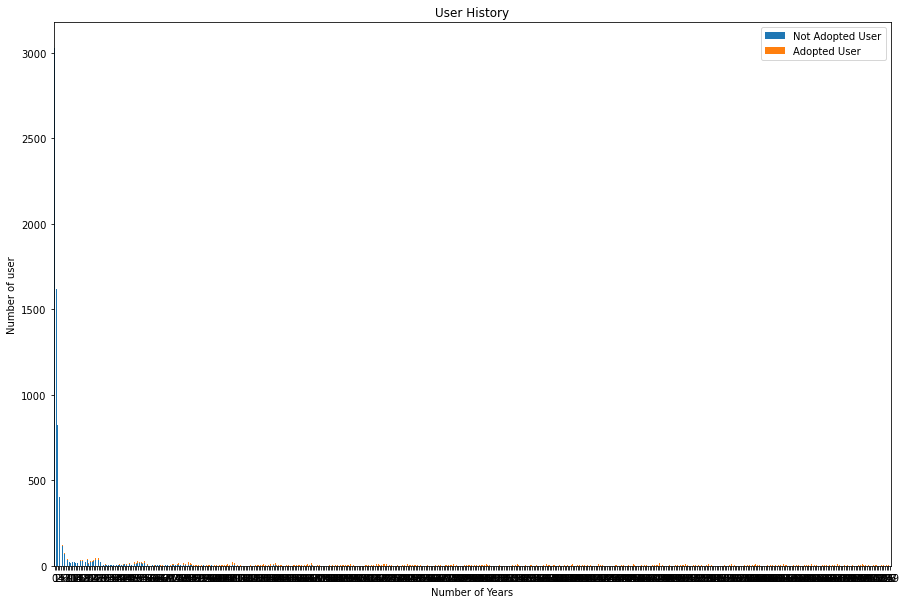

In [22]:
history.plot(kind='bar',
             figsize=(15,10),
             stacked=True,
             rot = 0,
             title='User History')
#labels
plt.ylabel('Number of user')
plt.xlabel('Number of Years')
#Rename legend
plt.legend(['Not Adopted User', 'Adopted User'], loc='upper right')

plt.show()

We can see that more adopted user on longer history. 

In [23]:
#drop 'creation_time' and 'last_session_creation_time'
df = df.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [24]:
##Categorical data - 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source', 'invited_by_user_id'

In [25]:
#Transform boolean data - onehot encoding
#opted_in_to_mailing_list
print(pd.pivot_table(df, index = 'opted_in_to_mailing_list', columns = 'adopted_user', values='user_id', aggfunc ='count'))

adopted_user                 0     1
opted_in_to_mailing_list            
0                         5370  1227
1                         1797   429


In [26]:
print('adopted user with opted into receiving marketing mail is:', 429/(1227+429)*100, '%')
print('unadopted user with opted into receiving marketing mail is:', 1797/(1797+5370)*100, '%')
print('adopted user not with opted into receiving marketing mail is:', 1227/(1227+429)*100, '%')
print('unadopted user not with opted into receiving marketing mail is:', 5370/(5370+1797)*100, '%')

adopted user with opted into receiving marketing mail is: 25.905797101449274 %
unadopted user with opted into receiving marketing mail is: 25.0732524068648 %
adopted user not with opted into receiving marketing mail is: 74.09420289855072 %
unadopted user not with opted into receiving marketing mail is: 74.9267475931352 %


From the metric above, whether receiving marketing email, has no big difference between adopted user and unadopted user. 

In [27]:
#enabled_for_marketing_drip
print(pd.pivot_table(df, index = 'enabled_for_marketing_drip', columns = 'adopted_user', values='user_id', aggfunc ='count'))

adopted_user                   0     1
enabled_for_marketing_drip            
0                           6083  1399
1                           1084   257


In [28]:
print('adopted user with regular marketing email drip is:', 257/(1399+257)*100, '%')
print('unadopted user with regular marketing email dri is:', 1084/(1084+6083)*100, '%')
print('adopted user not regular marketing email dri is:', 1399/(1399+257)*100, '%')
print('unadopted user not with regular marketing email dri is:', 6083/(6083+1084)*100, '%')

adopted user with regular marketing email drip is: 15.519323671497585 %
unadopted user with regular marketing email dri is: 15.124877912655224 %
adopted user not regular marketing email dri is: 84.48067632850241 %
unadopted user not with regular marketing email dri is: 84.87512208734478 %


From the metric above, whether with regular marketing email dri, has no big difference between adopted user and unadopted user. 

In [29]:
#'creation_source'
pd.DataFrame({'creation_source': df['creation_source'].value_counts()})

,creation_source
ORG_INVITE,3188
SIGNUP,1898
GUEST_INVITE,1588
SIGNUP_GOOGLE_AUTH,1385
PERSONAL_PROJECTS,764


In [30]:
#create dummy variables
creation_source1 = pd.get_dummies(df['creation_source'], prefix = 'cs')

In [31]:
creation_source1.head()

,cs_GUEST_INVITE,cs_ORG_INVITE,cs_PERSONAL_PROJECTS,cs_SIGNUP,cs_SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [32]:
#'invited_by_user_id'
#replace all nan values with 0
df['invited_by_user_id'] = df['invited_by_user_id'].fillna(0)

In [33]:
invited_by_user_id =pd.DataFrame({'invited by user id': df['invited_by_user_id'].value_counts()})
invited_by_user_id

,invited by user id
0.0,4047
4612.0,10
2308.0,9
11770.0,9
1525.0,8
...,...
3337.0,1
10797.0,1
5139.0,1
9819.0,1


In [34]:
#get tte categories with less 8 samples and replace them with 0
to_replace = list(invited_by_user_id[invited_by_user_id['invited by user id'] < 8].index)
df['invited_by_user_id'] = df['invited_by_user_id'].replace(to_replace, 0)

In [35]:
#create dummy variables
invited_by_user_id1 = pd.get_dummies(df['invited_by_user_id'], prefix = 'invited_by_user_')

In [36]:
invited_by_user_id1.head()

,invited_by_user__0.0,invited_by_user__730.0,invited_by_user__1525.0,invited_by_user__2308.0,invited_by_user__2354.0,invited_by_user__2527.0,invited_by_user__3261.0,invited_by_user__3721.0,invited_by_user__4302.0,invited_by_user__4612.0,invited_by_user__4803.0,invited_by_user__6706.0,invited_by_user__6808.0,invited_by_user__10628.0,invited_by_user__10741.0,invited_by_user__11770.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
#remove null value
invited_by_user_id1.drop(columns=['invited_by_user__0.0'], inplace = True)

#merge dummy variables to main dataframe merge all the new categories into our main dataframe and remove the old categorical columns

In [38]:
df=pd.merge(df, creation_source1, left_index = True, right_index=True)
df=pd.merge(df, invited_by_user_id1, left_index = True, right_index=True)

In [39]:
#remove old categorical columns
df.drop(columns=['creation_source', 'invited_by_user_id'], inplace = True)

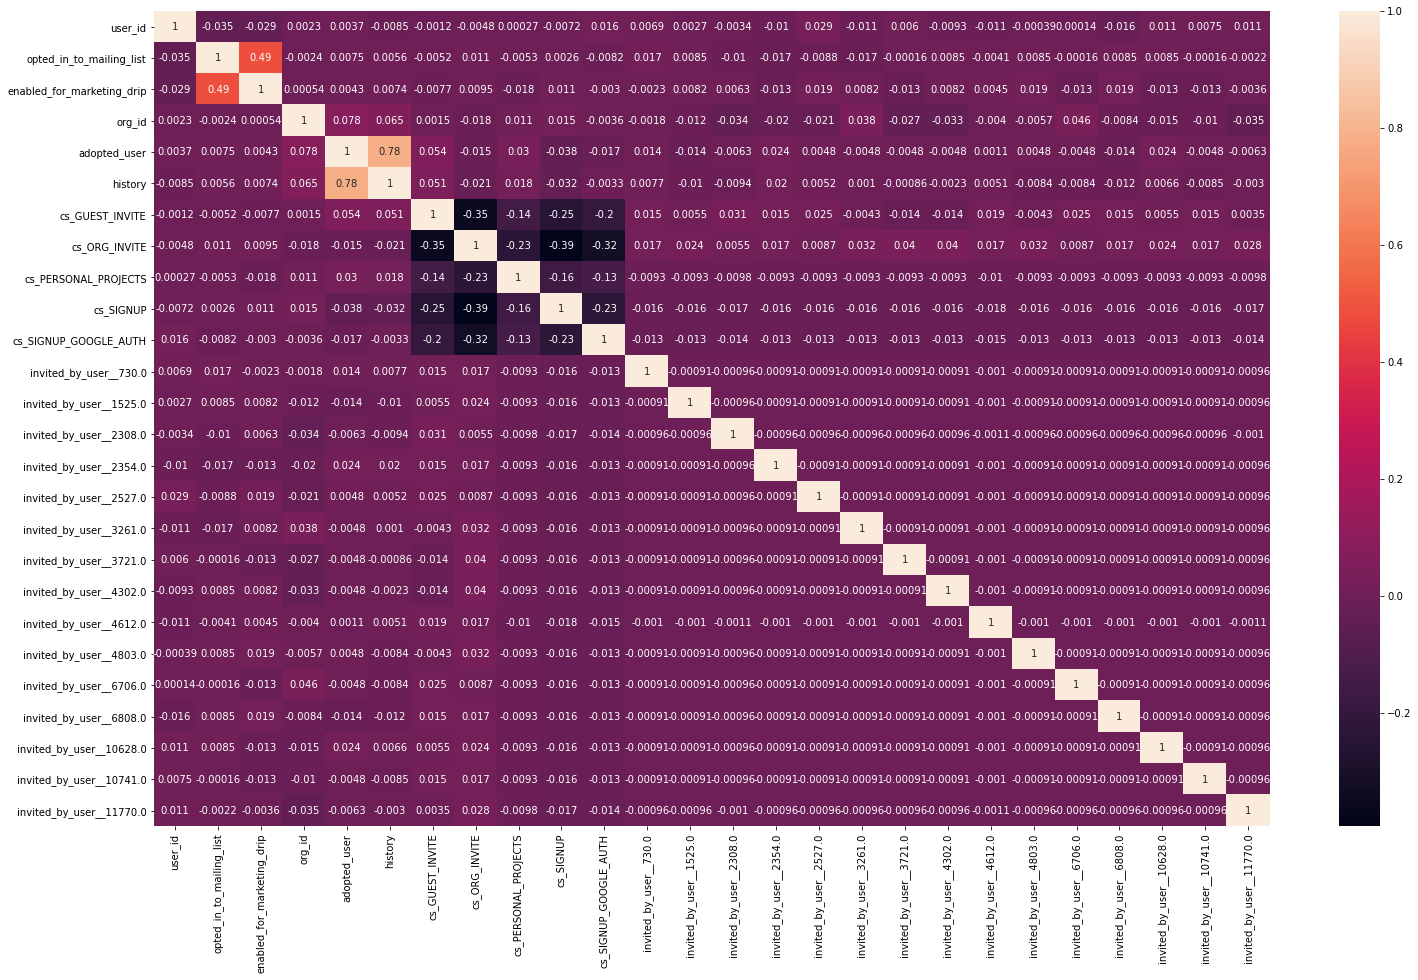

In [40]:
# Check for Corelation between features
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(),yticklabels=True,cbar=True, annot = True)

#Remove outliers Outlier critier: Data point that falls outside of 3 standard deviations. We will find out the outliers and replace them with the mean.

In [41]:
from scipy.stats import zscore

def replace_outliers_z_score(dataframe, column, Z=3):

    
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

# Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

# Replace with mean values

    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

# Print message

    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [42]:
#replace outlier with mean in history
df = replace_outliers_z_score(df, 'history')

Replaced: 358  outliers in  history


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     8823 non-null   int64  
 1   opted_in_to_mailing_list    8823 non-null   int64  
 2   enabled_for_marketing_drip  8823 non-null   int64  
 3   org_id                      8823 non-null   int64  
 4   adopted_user                8823 non-null   int32  
 5   history                     8823 non-null   float64
 6   cs_GUEST_INVITE             8823 non-null   uint8  
 7   cs_ORG_INVITE               8823 non-null   uint8  
 8   cs_PERSONAL_PROJECTS        8823 non-null   uint8  
 9   cs_SIGNUP                   8823 non-null   uint8  
 10  cs_SIGNUP_GOOGLE_AUTH       8823 non-null   uint8  
 11  invited_by_user__730.0      8823 non-null   uint8  
 12  invited_by_user__1525.0     8823 non-null   uint8  
 13  invited_by_user__2308.0     8823 

In [43]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [44]:
#Model Evaluation
y = df['adopted_user']
X = df.drop('adopted_user', axis=1)

# create training and testing sets, test size 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=5)

In [45]:
#Logistic Regression Model

#Over-sampling using SMOTE
#I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). 
#At a high level, SMOTE:
#1.Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
#2.Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
#We are going to implement SMOTE in Python.

In [46]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=5)
columns_lr = X_train.columns

In [51]:
os_df_X,os_df_y=os.fit_resample(X_train, y_train)
os_df_X = pd.DataFrame(data=os_df_X,columns=columns_lr )
os_df_y= pd.DataFrame(data=os_df_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_df_X))
print("Number of unadopted user in oversampled data",len(os_df_y[os_df_y['y']==0]))
print("Number of adopted user",len(os_df_y[os_df_y['y']==1]))
print("Proportion of unadopted user data in oversampled data is ",len(os_df_y[os_df_y['y']==0])/len(os_df_X))
print("Proportion of adopted user data in oversampled data is ",len(os_df_y[os_df_y['y']==1])/len(os_df_X))

length of oversampled data is  10722
Number of unadopted user in oversampled data 0
Number of adopted user 0
Proportion of unadopted user data in oversampled data is  0.0
Proportion of adopted user data in oversampled data is  0.0


In [56]:
#initial logistic regression model
lr = LogisticRegression()

# fit the model
lr = lr.fit(X_train, y_train)

from sklearn.metrics import classification_report
#Predicting the test set results and calculating the accuracy
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1806
           1       0.80      0.66      0.72       400

    accuracy                           0.91      2206
   macro avg       0.86      0.81      0.83      2206
weighted avg       0.90      0.91      0.90      2206



In [58]:
#scale the data for LR
from sklearn.preprocessing import scale
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=5)
lr_2 = lr.fit(Xs_train, y_train)
print('Scaled Logistic Regression score for test set: %f' % lr_2.score(Xs_test, y_test))
y_true, y_pred = y_test, lr_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

Scaled Logistic Regression score for test set: 0.907978
              precision    recall  f1-score   support

           0       0.93      0.97      0.94      1806
           1       0.80      0.65      0.72       400

    accuracy                           0.91      2206
   macro avg       0.87      0.81      0.83      2206
weighted avg       0.90      0.91      0.90      2206



In [ ]:
#The performance of logistic regression did not improve with data scaling

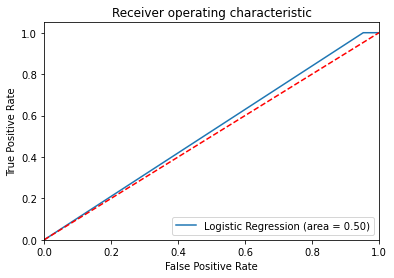

In [59]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Logistic regression model performs poor on the dataset.

In [61]:
#Random Forest Model
# use random forest model with balanced class weights to correct for imbalance in the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RF_clf = RandomForestClassifier(random_state=5, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model_GSCV = GridSearchCV(RF_clf, params)
model_GSCV.fit(X_train, y_train)
print('Best parameters were', model_GSCV.best_params_)
print('Best average precision was', model_GSCV.best_score_)

Best parameters were {'n_estimators': 200}
Best average precision was 0.958744202615588


In [63]:
y_pred_rf = model_GSCV.predict(X_test)

RF_clf = RF_clf.fit(X_train, y_train)
print('Scaled Random Forest score for test set: %f' % RF_clf.score(X_test, y_test))
y_true, y_pred_rf = y_test, RF_clf.predict(X_test)
print(classification_report(y_true, y_pred_rf))

Scaled Random Forest score for test set: 0.947416
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1806
           1       0.84      0.88      0.86       400

    accuracy                           0.95      2206
   macro avg       0.91      0.92      0.91      2206
weighted avg       0.95      0.95      0.95      2206



In [67]:
# take a look at feature importance
imp = pd.Series(RF_clf.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

history                       0.866024
org_id                        0.057978
user_id                       0.055217
opted_in_to_mailing_list      0.003776
cs_GUEST_INVITE               0.003343
enabled_for_marketing_drip    0.003326
cs_ORG_INVITE                 0.002245
cs_SIGNUP_GOOGLE_AUTH         0.002192
cs_SIGNUP                     0.002034
cs_PERSONAL_PROJECTS          0.001739
invited_by_user__11770.0      0.000324
invited_by_user__4612.0       0.000246
invited_by_user__1525.0       0.000239
invited_by_user__730.0        0.000219
invited_by_user__6706.0       0.000177
invited_by_user__2308.0       0.000150
invited_by_user__2527.0       0.000146
invited_by_user__2354.0       0.000144
invited_by_user__4302.0       0.000127
invited_by_user__6808.0       0.000084
invited_by_user__4803.0       0.000063
invited_by_user__3721.0       0.000062
invited_by_user__3261.0       0.000059
invited_by_user__10741.0      0.000048
invited_by_user__10628.0      0.000040
dtype: float64


In [ ]:
#from random forest model, it is clear that history is most important feature of the dataset for predicting adopted user.